In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from astropy.stats import circvar
from astropy import units as u

In [3]:
def replace_area_name(df, area_key):
# df = dataframe containing an area array column
# area_key = string

    df[area_key] = df[area_key].replace(1, 'V1')
    df[area_key] = df[area_key].replace(2, 'LM')
    df[area_key] = df[area_key].replace(3, 'LI')
    
    return df

## Response Amplitude by area

In [3]:
temp = loadmat('C:/Users/lan/Documents/repos/inter/plot/CV SNR OSI R2 ori_perc by area - why HVA lack well fit/amp_area.mat')
df = pd.DataFrame(temp['resp_ad'], columns=['resp_ad'])
df['area_ad'] = temp['area_ad']
df['area_ad'] = df['area_ad'].replace(1, 'V1')
df['area_ad'] = df['area_ad'].replace(2, 'LM')
df['area_ad'] = df['area_ad'].replace(3, 'LI')
df.tail()

,resp_ad,area_ad
479,0.010215,LM
480,0.040586,LM
481,0.037092,LM
482,0.035262,LM
483,0.038123,LM


In [111]:
df2 = pd.DataFrame(temp['resp_tg_collapse_ori'], columns=['resp_tg_avg_ori'])
df2['area_tg'] = temp['area_tg']
df2['area_tg'] = df2['area_tg'].replace(1, 'V1')
df2['area_tg'] = df2['area_tg'].replace(2, 'LM')
df2['area_tg'] = df2['area_tg'].replace(3, 'LI')
df2.tail()

,resp_tg_avg_ori,area_tg
407,0.025418,LM
408,0.021595,LM
409,0.058434,LM
410,0.046758,LM
411,0.040096,LM


In [112]:
df.groupby('area_ad', sort=False).describe().reset_index()

area_ad resp_ad                                                              \
            count      mean       std       min       25%       50%       75%   
0      V1   267.0  0.080751  0.069315  0.011885  0.033769  0.057628  0.108478   
1      LM   141.0  0.077834  0.092100  0.010215  0.033665  0.051986  0.092534   
2      LI    76.0  0.068316  0.058048  0.012089  0.029422  0.050297  0.087156   

             
        max  
0  0.486399  
1  0.755541  
2  0.319786

In [113]:
df2.groupby('area_tg', sort=False).describe().reset_index()

area_tg resp_tg_avg_ori                                                    \
                    count      mean       std       min       25%       50%   
0      V1           239.0  0.083117  0.062466  0.009222  0.043842  0.063730   
1      LM           107.0  0.086615  0.092219  0.015696  0.037610  0.057234   
2      LI            66.0  0.078257  0.049079  0.022743  0.042143  0.064019   

                       
        75%       max  
0  0.100160  0.435435  
1  0.103541  0.644160  
2  0.099516  0.241633

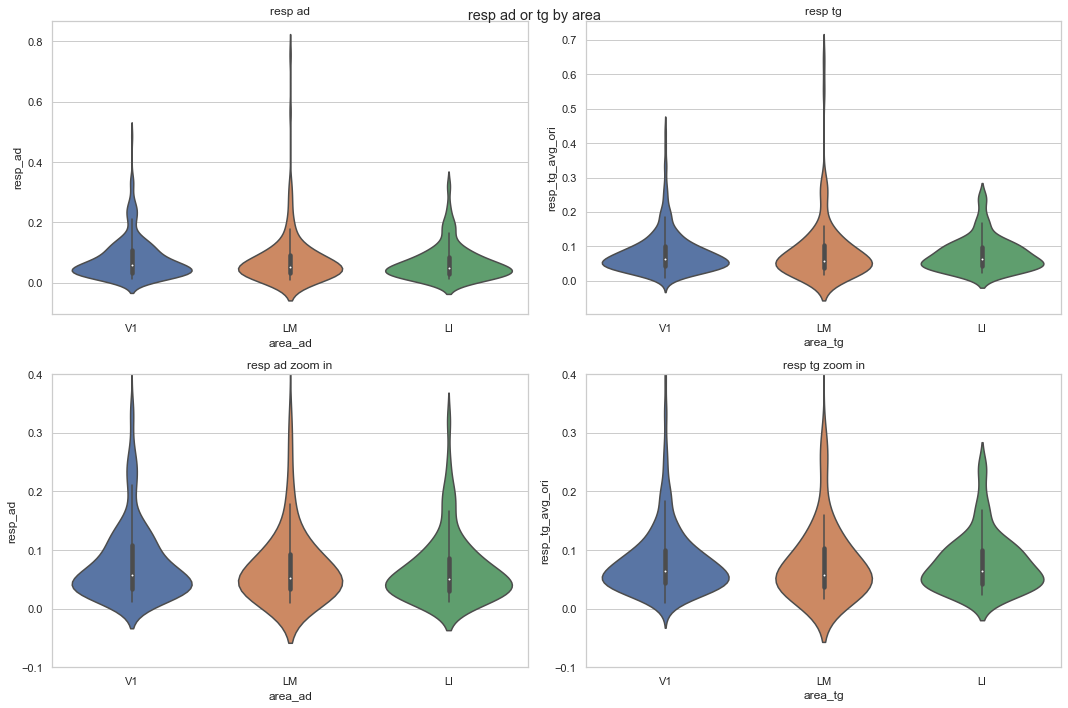

In [124]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
fig.suptitle('resp ad or tg by area')

# resp ad
ax = sns.violinplot(ax=axes[0,0], x="area_ad", y="resp_ad", data=df)
axes[0,0].set_title('resp ad')

# resp tg
ax = sns.violinplot(ax=axes[0,1], x="area_tg", y="resp_tg_avg_ori", data=df2)
axes[0,1].set_title('resp tg')

# resp ad zoom in
ax = sns.violinplot(ax=axes[1,0], x="area_ad", y="resp_ad", data=df)
ax.set(ylim=(-0.1, 0.4))
axes[1,0].set_title('resp ad zoom in')

# resp tg zoom in
ax = sns.violinplot(ax=axes[1,1], x="area_tg", y="resp_tg_avg_ori", data=df2)
ax.set(ylim=(-0.1, 0.4))
axes[1,1].set_title('resp tg zoom in')

fig.tight_layout()

### Polar plot of resp_ori by area

In [4]:
ncell_tg = temp['resp_tg'].shape[0]
nori = temp['resp_tg'].shape[1]
resp_tg_cell = []
resp_tg_sorted = np.zeros((ncell_tg, nori))

for icell in np.arange(ncell_tg):
    resp_tg_cell = temp['resp_tg'][icell, :]
    resp_tg_sorted[icell, :] = np.concatenate((resp_tg_cell[np.argmax(resp_tg_cell):len(resp_tg_cell)], resp_tg_cell[0:np.argmax(resp_tg_cell)]))
    
df3 = pd.DataFrame(resp_tg_sorted)
df3['area'] = temp['area_tg']
df3 = replace_area_name(df3, 'area')
df3

,0,1,2,3,4,5,6,7,area
0,0.186297,0.184818,0.095037,0.053145,0.037715,0.041623,0.050704,0.185359,V1
1,0.108755,0.042337,-0.003442,0.007771,-0.021082,-0.017110,0.035048,0.096532,V1
2,0.334310,0.331804,0.054893,0.075347,0.037645,0.046042,0.088307,0.192283,V1
3,0.866983,0.851523,0.237683,0.124013,0.058653,0.050948,0.023531,0.501670,V1
4,0.094991,0.010616,0.023006,0.033687,0.009473,0.022536,0.073898,0.083687,V1
...,...,...,...,...,...,...,...,...,...
407,0.092442,0.050402,0.049153,-0.021308,-0.012517,0.032724,0.009602,0.002845,LM
408,0.059946,-0.015757,0.048349,0.010541,-0.002692,0.018728,0.034506,0.019142,LM
409,0.100901,0.012366,0.078618,0.058513,0.019648,0.067646,0.069631,0.060153,LM
410,0.091941,0.039788,0.039541,0.031566,0.082758,0.014472,0.040642,0.033356,LM


In [5]:
df3.groupby('area', sort=False).count().reset_index()

,area,0,1,2,3,4,5,6,7
0,V1,239,239,239,239,239,239,239,239
1,LM,107,107,107,107,107,107,107,107
2,LI,66,66,66,66,66,66,66,66


In [118]:
df_median = df3.groupby('area', sort=False).median().reset_index()
df_median

,area,0,1,2,3,4,5,6,7
0,V1,0.144829,0.074164,0.049312,0.036211,0.034849,0.035739,0.044892,0.072835
1,LM,0.118889,0.068838,0.051055,0.040134,0.030842,0.039416,0.047986,0.068135
2,LI,0.106541,0.074895,0.054512,0.049813,0.041845,0.056051,0.057500,0.073321


In [7]:
df_mean = df3.groupby('area', sort=False).mean().reset_index()
df_mean

,area,0,1,2,3,4,5,6,7
0,V1,0.189429,0.105789,0.061552,0.050540,0.043605,0.048948,0.060476,0.104599
1,LM,0.159020,0.100637,0.078627,0.058909,0.058579,0.063240,0.077658,0.096254
2,LI,0.135697,0.087246,0.066252,0.053657,0.057660,0.068695,0.070728,0.086117


In [8]:
df_median = df3.groupby('area', sort=False).median().reset_index()
df_median

,area,0,1,2,3,4,5,6,7
0,V1,0.144829,0.074164,0.049312,0.036211,0.034849,0.035739,0.044892,0.072835
1,LM,0.118889,0.068838,0.051055,0.040134,0.030842,0.039416,0.047986,0.068135
2,LI,0.106541,0.074895,0.054512,0.049813,0.041845,0.056051,0.057500,0.073321


In [9]:
df_std = df3.groupby('area', sort=False).std().reset_index()
df_std

,area,0,1,2,3,4,5,6,7
0,V1,0.137807,0.106330,0.062236,0.057600,0.046306,0.062865,0.064945,0.104128
1,LM,0.124312,0.111539,0.096953,0.080087,0.086121,0.084268,0.103900,0.105930
2,LI,0.079208,0.057271,0.051583,0.046024,0.050421,0.054776,0.061219,0.066770


In [30]:
arr_median = df_median.to_numpy()
arr_median = arr_median[0:3, 1:nori+1]
arr_median = np.concatenate((arr_median, arr_median[:,0].reshape([3,1])), axis=1)

arr_mean = df_mean.to_numpy()
arr_mean = arr_mean[0:3, 1:nori+1]
arr_mean = np.concatenate((arr_mean, arr_mean[:,0].reshape([3,1])), axis=1)

arr_std = df_std.to_numpy()
arr_std = arr_std[0:3, 1:nori+1]
arr_std = np.concatenate((arr_std, arr_std[:,0].reshape([3,1])), axis=1)

ncell_area = df3.groupby('area', sort=False).count().reset_index()[0]
ncell_area = ncell_area.to_numpy().reshape([3,1])
arr_sem = arr_std / np.sqrt(ncell_area)

N = nori * 2
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii_V1_med = np.concatenate((arr_median[0], arr_median[0]))
radii_LM_med = np.concatenate((arr_median[1], arr_median[1]))
radii_LI_med = np.concatenate((arr_median[2], arr_median[2]))
radii_V1_mean = np.concatenate((arr_mean[0], arr_mean[0]))
radii_LM_mean = np.concatenate((arr_mean[1], arr_mean[1]))
radii_LI_mean = np.concatenate((arr_mean[2], arr_mean[2]))
width = np.pi / nori

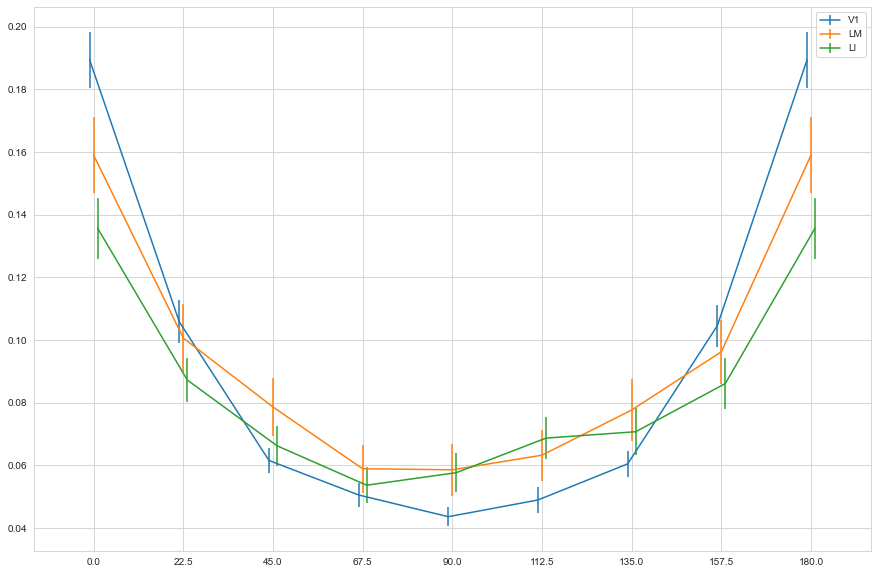

In [43]:
deg = np.linspace(0.0, 180, 8, endpoint=False)
deg = np.asarray([*deg, 180])

plt.figure(figsize=(15, 10))
plt.errorbar(deg-1, arr_mean[0], yerr=arr_sem[0], label='V1')
plt.errorbar(deg, arr_mean[1], yerr=arr_sem[1], label='LM')
plt.errorbar(deg+1, arr_mean[2], yerr=arr_sem[2], label='LI')
plt.xlim([-15,195])
plt.xticks(np.arange(0, 200, step=22.5))
plt.legend()

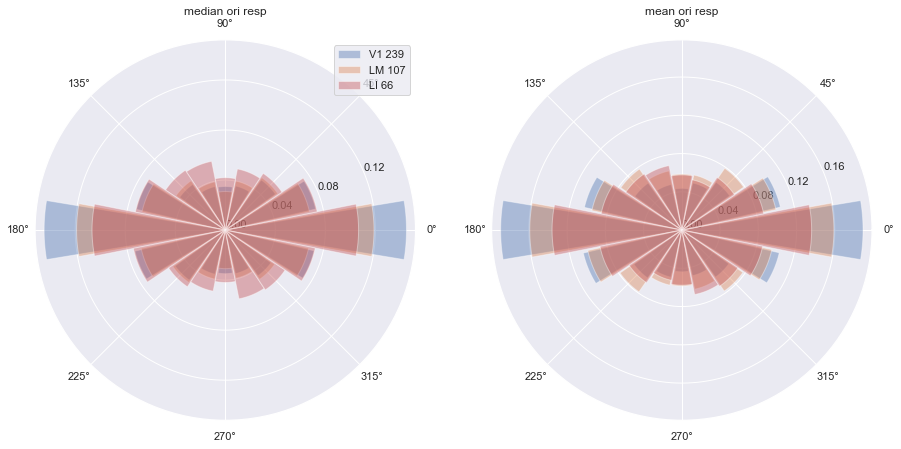

In [178]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(121, projection='polar')
ax.bar(theta, radii_V1_med, width=width/1.2, bottom=0.0, color='C0', alpha=0.4)
ax.bar(theta, radii_LM_med, width=width/1.1, bottom=0.0, color='C1', alpha=0.4)
ax.bar(theta, radii_LI_med, width=width/1.0, bottom=0.0, color='C3', alpha=0.4)
plt.yticks(np.arange(0, 0.16, step=0.04))
ax.legend(['V1 239', 'LM 107', 'LI 66'])
plt.title('median ori resp')

ax = plt.subplot(122, projection='polar')
ax.bar(theta, radii_V1_mean, width=width/1.2, bottom=0.0, color='C0', alpha=0.4)
ax.bar(theta, radii_LM_mean, width=width/1.1, bottom=0.0, color='C1', alpha=0.4)
ax.bar(theta, radii_LI_mean, width=width/1.0, bottom=0.0, color='C3', alpha=0.4)
plt.title('mean ori resp')
plt.yticks(np.arange(0, 0.18, step=0.04))
plt.show()

## Circular variance
cirvar is calculated with positive values only. all negative responses are rectified to 0.  
https://stackoverflow.com/questions/52856232/scipy-circular-variance  
https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Circular_Data_Analysis.pdf  
https://docs.astropy.org/en/stable/api/astropy.stats.circvar.html

In [5]:
temp = loadmat('C:/Users/lan/Documents/repos/inter/plot/CV SNR OSI R2 ori_perc by area - why HVA lack well fit/corr_well_fit_HVA_w_cirvar.mat')

ori_list = np.arange(0, 180, 22.5)
temp['dfof_tg_ori'].shape

(539, 8)

In [8]:
ncell = temp['dfof_tg_ori'].shape[0]
nori = 8
cirvar = np.pi * np.ones((ncell, 1))

for icell in range(0, ncell):
    pseudo = [] # pretend there is a dist of angles, to calculate circular variance
    
    for j in range(0, nori):
        pseudo.append([ori_list[j]] * int(temp['dfof_tg_ori'][icell][j])) 
        pseudo_flat = [item for sublist in pseudo for item in sublist]
        cell_data = np.asarray(pseudo_flat)*u.deg
        cirvar[icell] = float(circvar(cell_data))
        
cirvar.shape

(539, 1)

## ori_perc correlates with?
- areacode, vis_driven, well_fit  
- ori_perc  
- OSI, R2, width, SNR

In [10]:
temp = loadmat('C:/Users/lan/Documents/repos/inter/plot/CV SNR OSI R2 ori_perc by area - why HVA lack well fit/corr_well_fit_HVA.mat')
del temp['__header__']
del temp['__version__']
del temp['__globals__']
temp.keys()

dict_keys(['OSI', 'R2', 'SSE', 'area_merge', 'coeff_var', 'ori_perc_all', 'sharp', 'vis', 'well_fit'])

In [20]:
df = pd.DataFrame(temp['area_merge'], columns=['area'])
for key in temp.keys():
    df[key] = temp[key]

df = df.drop(columns='area_merge')
df['vis_well_fit'] = df['well_fit'] & df['vis'] # true well fit: both visually driven and well fit
df['cirvar'] = cirvar
df['area'] = df['area'].replace(1, 'V1').replace(2, 'LM').replace(3, 'LI')

df = df[['area', 'vis', 'vis_well_fit', 'ori_perc_all',
    'OSI', 'cirvar', 'sharp', 
    'R2', 'SSE', 'coeff_var']]
df

,area,vis,vis_well_fit,ori_perc_all,OSI,cirvar,sharp,R2,SSE,coeff_var
0,V1,1,1,13.547029,0.663277,0.349520,1.023177,0.909820,0.003040,0.535121
1,V1,1,0,48.059424,0.850999,0.681062,1.996114,0.912416,0.001510,1.009372
2,V1,1,1,7.232809,1.092288,0.358198,4.778365,0.982684,0.001656,1.422472
3,V1,1,1,9.414715,0.797583,0.257346,1.942407,0.936868,0.006974,1.031213
4,V1,1,1,6.014102,0.873269,0.279476,1.706776,0.954914,0.039923,0.654318
...,...,...,...,...,...,...,...,...,...,...
534,LM,1,0,63.430514,1.910872,0.312103,5.133380,0.475880,0.002292,2.380167
535,LM,1,0,66.002012,0.110790,0.279282,11.043474,0.399251,0.001712,1.650603
536,LM,0,0,48.838387,-5.453014,0.125727,14.587119,0.096769,0.015097,2.158161
537,LM,1,0,47.597539,0.030316,0.219823,14.032211,0.262120,0.004684,3.868961


### Visually driven or well fit cell percentage vs area
V1 and LM are comparably driven by gratings, LI is less so.  
from V1 to LM to LI, well-fit cell number decreases.

In [36]:
df[['area','vis','well_fit','vis_well_fit']].groupby('area', sort=False).mean().reset_index()

,area,vis,well_fit,vis_well_fit
0,V1,0.945392,0.433447,0.402730
1,LM,0.931250,0.162500,0.162500
2,LI,0.883721,0.116279,0.069767


In [37]:
df[['area','vis','well_fit','vis_well_fit']].groupby('area', sort=False).std().reset_index()

,area,vis,well_fit,vis_well_fit
0,V1,0.227601,0.496399,0.491286
1,LM,0.253823,0.370067,0.370067
2,LI,0.322439,0.322439,0.256249


### OSI vs ori_perc

OSI = (dfof_pref - dfof_orth) ./ (dfof_pref + dfof_orth); should be btw 0-1 if response to grating is always positive (which is not the case)  
as ori_perc increases (less well-fit), OSI decreases. this is true for all cells & well-fit subgroup

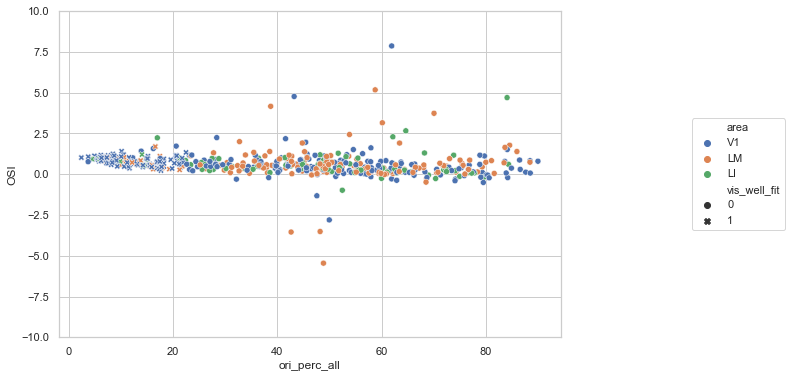

In [68]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(-10,10);

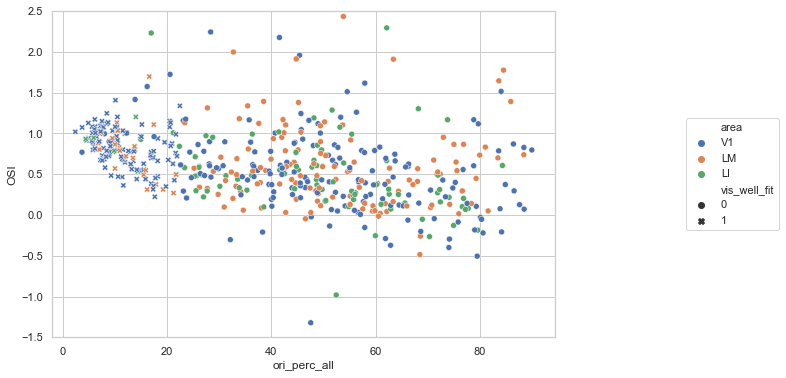

In [70]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(-1.5,2.5);

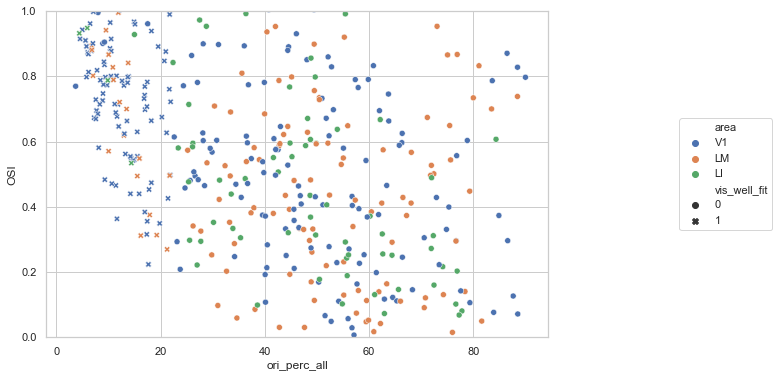

In [71]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(0,1);

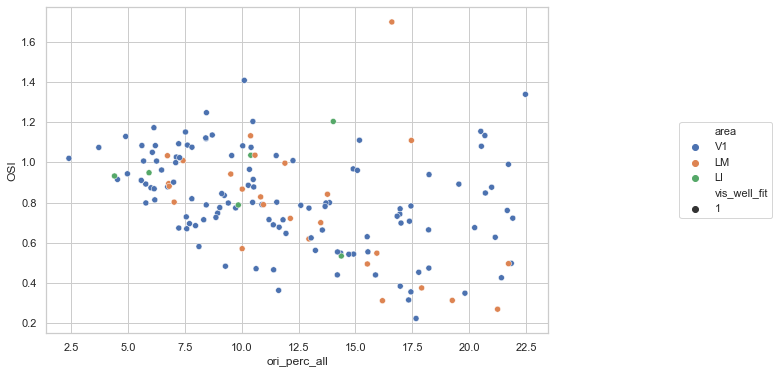

In [87]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit==1], x="ori_perc_all", y="OSI", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.ylim(0,1);

### OSI vs cirvar

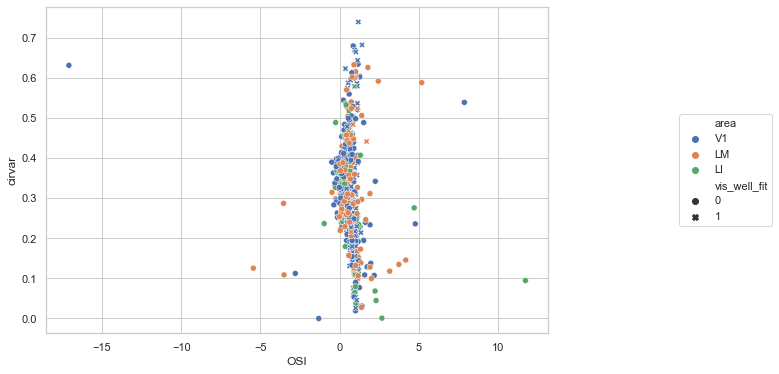

In [22]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="OSI", y="cirvar", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

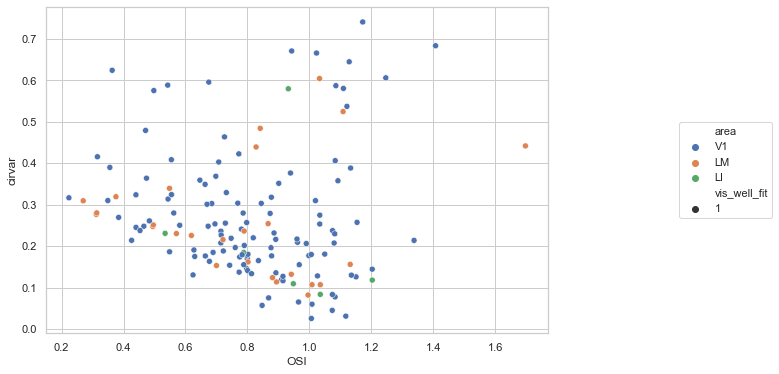

In [23]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit == 1], x="OSI", y="cirvar", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

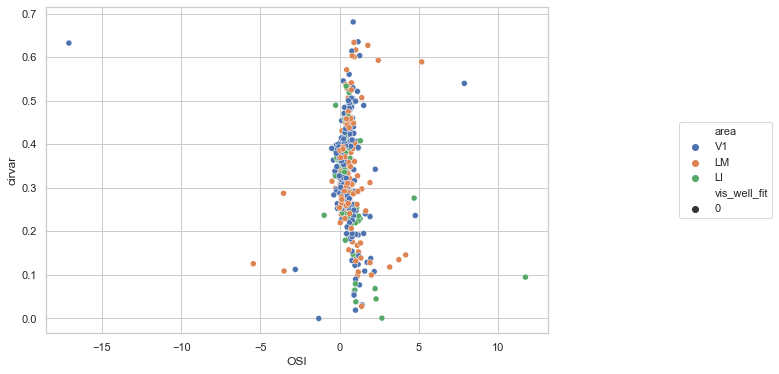

In [24]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit == 0], x="OSI", y="cirvar", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

### R2 vs ori_perc
as ori_perc increases (less well-fit), R2 decreases. this is true for all cells & well-fit subgroup

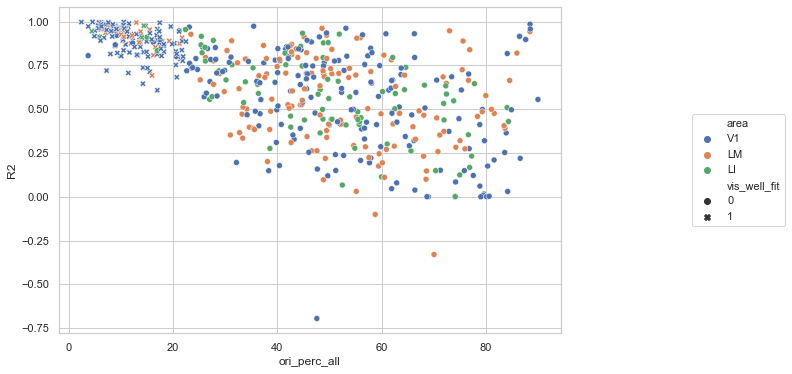

In [72]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="R2", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

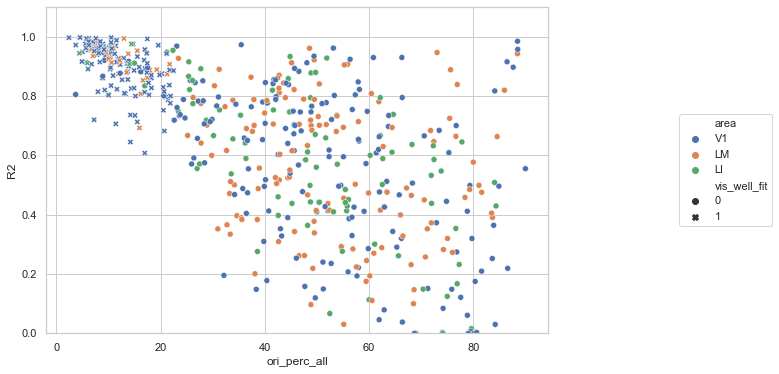

In [73]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="R2", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(0,1.1);

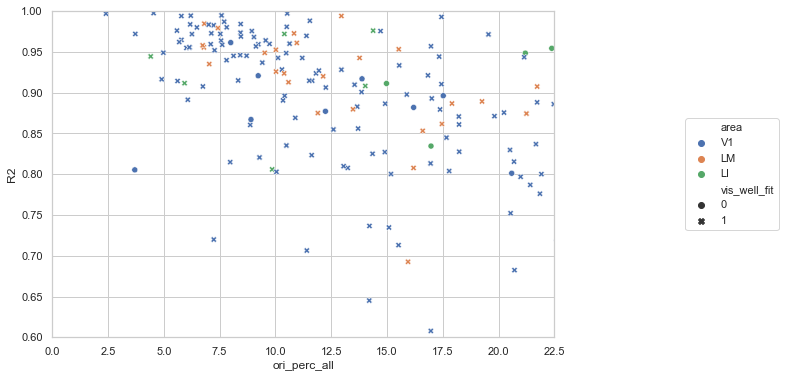

In [75]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="R2", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlim(0,22.5);
plt.ylim(0.6,1);

### sharpness of tuning curve vs ori_perc
as ori_perc increases (less well-fit), sharpness decreases for well-fit subgroup.  
non-well-fit cells are fit with chaotic tuning curve.

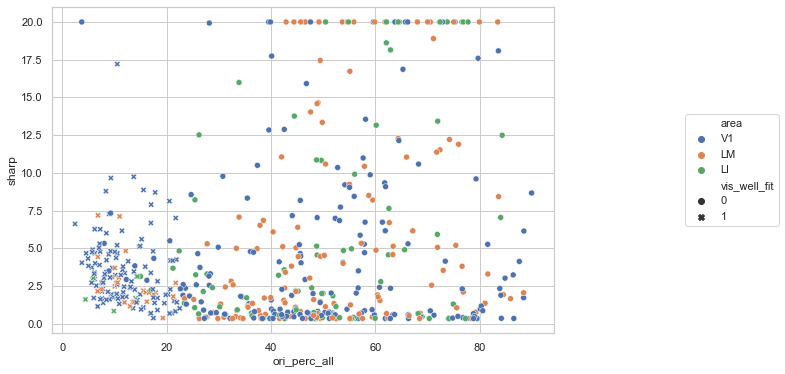

In [76]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="sharp", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
# plt.ylim(0.6,1);

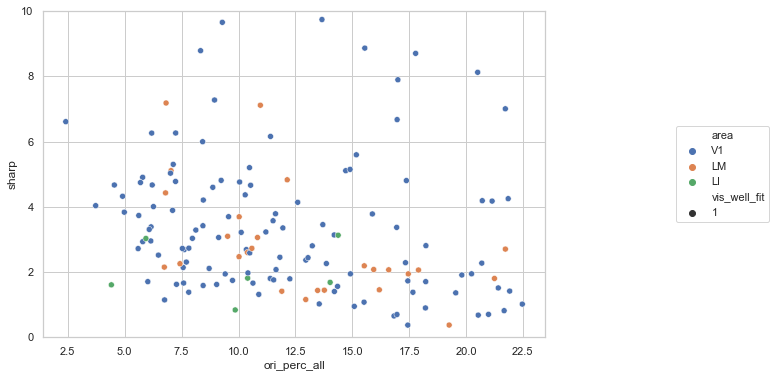

In [80]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit==1], x="ori_perc_all", y="sharp", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
plt.ylim(0,10);

### SNR vs ori_perc
as ori_perc increases (less well-fit), coefficient of variance increases (SNR decreases). this is true for all cells & well-fit subgroup, and expected by the well fit criteria (the stability of bootstrap fits)

In [170]:
df[['area','coeff_var']].groupby('area', sort=False).median().reset_index()

,area,coeff_var
0,V1,1.370924
1,LM,1.583869
2,LI,1.439483


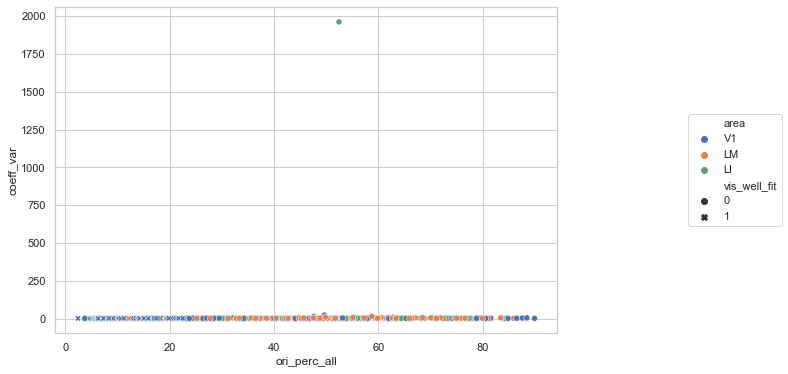

In [86]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df, x="ori_perc_all", y="coeff_var", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
# plt.ylim(0.6,1);

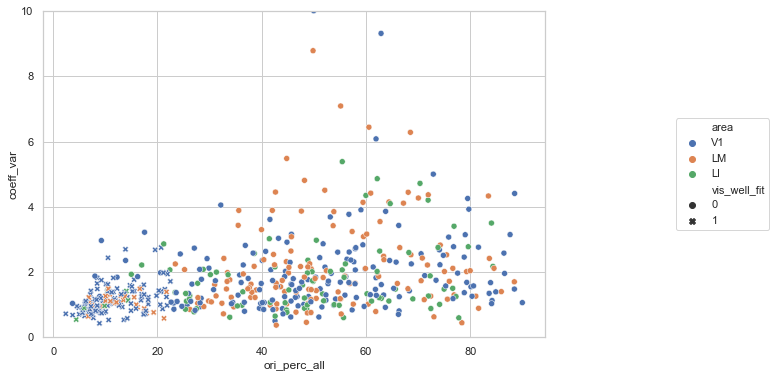

In [83]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.coeff_var<100], x="ori_perc_all", y="coeff_var", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# plt.xlim(0,22.5);
plt.ylim(0,10);

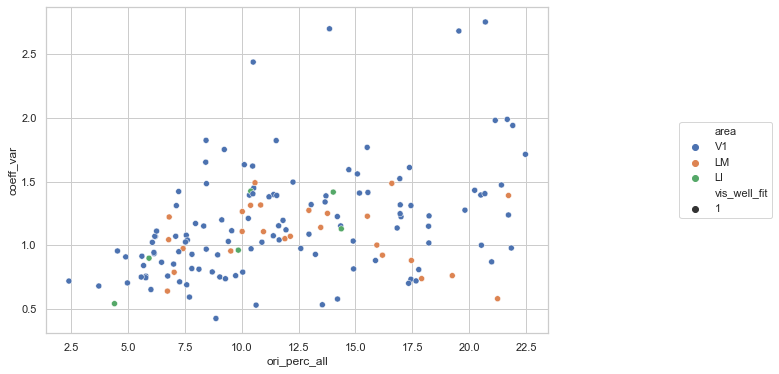

In [85]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set_style("whitegrid")

g = sns.scatterplot(data=df[df.vis_well_fit==1], x="ori_perc_all", y="coeff_var", hue="area", style="vis_well_fit");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

## corr btw ori_perc vs all

In [28]:
df

,area,vis,vis_well_fit,ori_perc_all,OSI,cirvar,sharp,R2,SSE,coeff_var
0,V1,1,1,13.547029,0.663277,0.349520,1.023177,0.909820,0.003040,0.535121
1,V1,1,0,48.059424,0.850999,0.681062,1.996114,0.912416,0.001510,1.009372
2,V1,1,1,7.232809,1.092288,0.358198,4.778365,0.982684,0.001656,1.422472
3,V1,1,1,9.414715,0.797583,0.257346,1.942407,0.936868,0.006974,1.031213
4,V1,1,1,6.014102,0.873269,0.279476,1.706776,0.954914,0.039923,0.654318
...,...,...,...,...,...,...,...,...,...,...
534,LM,1,0,63.430514,1.910872,0.312103,5.133380,0.475880,0.002292,2.380167
535,LM,1,0,66.002012,0.110790,0.279282,11.043474,0.399251,0.001712,1.650603
536,LM,0,0,48.838387,-5.453014,0.125727,14.587119,0.096769,0.015097,2.158161
537,LM,1,0,47.597539,0.030316,0.219823,14.032211,0.262120,0.004684,3.868961


In [30]:
df['area'] = df['area'].replace('V1',1).replace('LM',2).replace('LI',3)
# df = df.drop(columns='well_fit')

df_corr = df.corr(method ='pearson')
df_corr[['area', 'vis', 'vis_well_fit', 'ori_perc_all']]

,area,vis,vis_well_fit,ori_perc_all
area,1.000000,-0.080810,-0.302078,0.230669
vis,-0.080810,1.000000,0.168585,0.031716
vis_well_fit,-0.302078,0.168585,1.000000,-0.756020
ori_perc_all,0.230669,0.031716,-0.756020,1.000000
OSI,0.029047,-0.078676,0.095778,-0.152942
cirvar,-0.057084,0.288578,-0.189930,0.353272
sharp,0.118279,-0.111279,-0.165397,0.238581
R2,-0.167217,0.031158,0.561621,-0.644296
SSE,-0.105474,0.027109,-0.001424,-0.010152
coeff_var,0.080715,-0.163824,-0.031896,0.027355


In [31]:
df_corr

,area,vis,vis_well_fit,ori_perc_all,OSI,cirvar,sharp,R2,SSE,coeff_var
area,1.000000,-0.080810,-0.302078,0.230669,0.029047,-0.057084,0.118279,-0.167217,-0.105474,0.080715
vis,-0.080810,1.000000,0.168585,0.031716,-0.078676,0.288578,-0.111279,0.031158,0.027109,-0.163824
vis_well_fit,-0.302078,0.168585,1.000000,-0.756020,0.095778,-0.189930,-0.165397,0.561621,-0.001424,-0.031896
ori_perc_all,0.230669,0.031716,-0.756020,1.000000,-0.152942,0.353272,0.238581,-0.644296,-0.010152,0.027355
OSI,0.029047,-0.078676,0.095778,-0.152942,1.000000,-0.127640,-0.009227,0.203248,-0.020241,-0.057995
cirvar,-0.057084,0.288578,-0.189930,0.353272,-0.127640,1.000000,-0.040121,-0.056433,0.037891,-0.025076
sharp,0.118279,-0.111279,-0.165397,0.238581,-0.009227,-0.040121,1.000000,-0.116045,-0.109171,-0.026492
R2,-0.167217,0.031158,0.561621,-0.644296,0.203248,-0.056433,-0.116045,1.000000,-0.087097,-0.100057
SSE,-0.105474,0.027109,-0.001424,-0.010152,-0.020241,0.037891,-0.109171,-0.087097,1.000000,0.009794
coeff_var,0.080715,-0.163824,-0.031896,0.027355,-0.057995,-0.025076,-0.026492,-0.100057,0.009794,1.000000


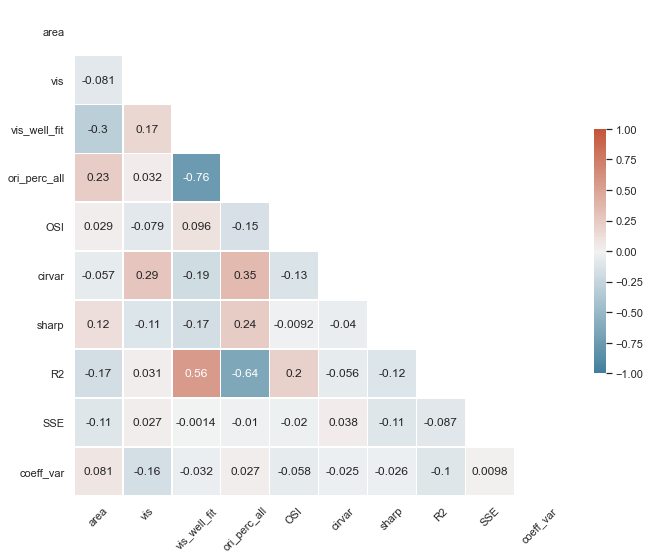

In [43]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # Generate a mask for the upper triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45);

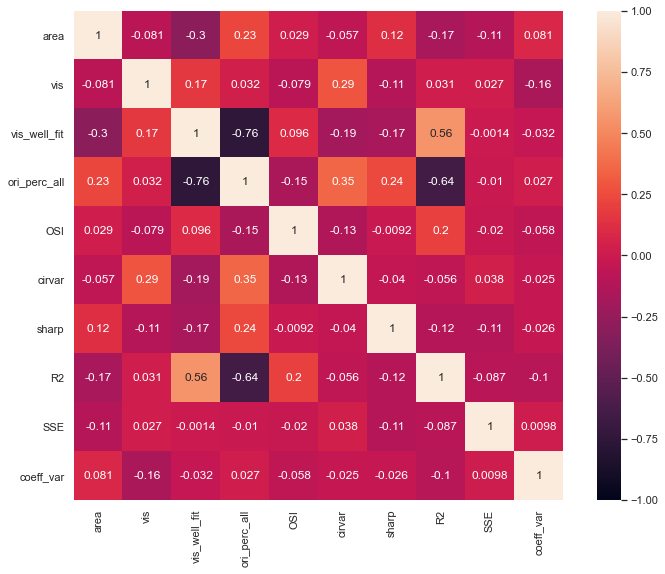

In [44]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(df_corr, vmin=-1, vmax=1, square=True, annot=True)